•	We will implement a friend recommendation system in python using collaborative filtering

•	We plan to use and analyze two methods for recommending friends to a user based on their common friends and influence of number of friends.

•	To find the potential friends we will measure them using the 'score' metric where a higher score would mean that user is a better candidate for being friend.

.•	We will then test the recommendation system accuracy by removing the friendship edges of all friends in the Facebook data and then compute which method gives the most similar recommendations to that of the original data.

•	We would perform many trails of randomly chosen users from the data to compute accuracies.

•	A subset map of friendship of the users will be displayed using edges and nodes in the form of graphs in python.


# **Recommendation System**

A recommender system or a recommendation system is a subclass of information filtering system that seeks to predict the "rating" or "preference" that a user would give to an item. Recommender systems have become increasingly popular in recent years and are utilized in a variety of areas including movies, music, news, books, research articles, search queries, social tags, and products in general. There are also recommender systems for experts, collaborators, jokes, restaurants, garments, financial services, life insurance, online dating, and Twitter pages. Facebook suggests people you could be friends with. The actual algorithms used by these companies are closely-guarded trade secrets. There are two general approaches: collaborative filtering and content-based filtering.

# **Content based Filtering**

•	Idea: If you like an item then you will also like a "similar" item

•	Based on similarity of the items being recommended

•	It generally works well when it's easy to determine the context/properties of each item. For instance, when we are recommending the same kind of item like a movie recommendation or song recommendation.


# **Collaborative filtering**

•	Idea: If a person A likes item 1, 2, 3 and B like 2,3,4 then they have similar interests and A should like item 4 and B should like item 1.

•	This algorithm is entirely based on the past behavior and not on the context. This makes it one of the most commonly used algorithm as it is not dependent on any additional information. • For instance: product recommendations by e-commerce player like Amazon and merchant recommendations by banks like American Express .

User-User Collaborative filtering, Item-ltem Collaborative filtering and Other simpler algorithms

In friend recommendation systems, the dataset contains people and their connections or friendships with other people. These connections are used as edges and people are used as nodes in a graph. The graph obtained from the dataset is called social network of friends. For a user, the recommendation system predicts the most suitable friend for becoming the friend in future.

# Constructing a practice graph:

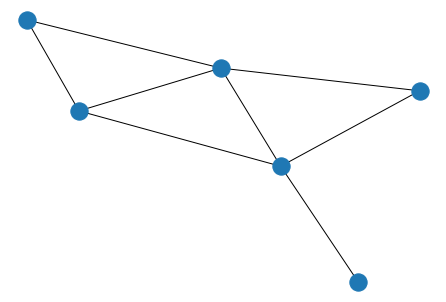

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

p_graph = nx.Graph()

p_graph.add_node("A")
p_graph.add_node("B")
p_graph.add_node("C")
p_graph.add_node("D")
p_graph.add_node("E")
p_graph.add_node("F")
p_graph.add_edge("A", "B")
p_graph.add_edge("A", "C")
p_graph.add_edge("B", "C")
p_graph.add_edge("B", "D")
p_graph.add_edge("C", "D")
p_graph.add_edge("D", "F")
p_graph.add_edge("D", "E")
p_graph.add_edge("C", "F")


assert len(p_graph.nodes()) == 6
assert len(p_graph.edges()) == 8

nx.draw(p_graph)
plt.show()


# **Algorithm 1 - Recommending by no. of common friends**


One of the important factors while recommending new friends to a user is the number of mutual or common friends between them. As per the definition of collaborative filtering if two users have similar past preferences then their next maybe same as well, this makes common friends an important criteria. We will take graph of friends as input and output recommendation list of new friends based on number of common friends.

The Algorithm can be easily understood by using our practice graph. There are five nodes in the graph namely A,B,C,D,E and F. An edge between any two nodes ( for e.g A and B in the graph) implies that they are already friends.
Lets say we want to find new friend recommendations for node A, from the graph it is clear that A is already friends with B and C. Hence the recommendation list won't include B, C and the user himself in our case A.
We have implemented seven functions to achieve this, they are 1) friends(graph,user)
2)	friends_of_friends(graph,user)
3)	 ,user2)
4)	number_of_common_friends_map(graph,user)
5)	number_map_sorted_list(friendmap)
6)	number_map_sorted_list(friendmap)
7)	recommend_by_number_of_common_friends(graph,user)


In [35]:
import operator
import networkx as nx
import matplotlib.pyplot as plt
import random
import sys

def create_romeojuliet_graph():
    rj = nx.Graph()
    rj.add_node("Tybalt")
    rj.add_node("Nurse")
    rj.add_node("Juliet")
    rj.add_node("Friar Laurence")
    rj.add_node("Capulet")
    rj.add_node("Benvolio")
    rj.add_node("Romeo")
    rj.add_node("Mercutio")
    rj.add_node("Montague")
    rj.add_node("Paris")
    rj.add_node("Escalus")

    rj.add_edge("Juliet", "Tybalt")
    rj.add_edge("Nurse", "Juliet")
    rj.add_edge("Juliet", "Capulet")
    rj.add_edge("Juliet", "Romeo")
    rj.add_edge("Juliet", "Friar Laurence")
    rj.add_edge("Tybalt", "Capulet")
    rj.add_edge("Romeo", "Benvolio")
    rj.add_edge("Romeo", "Friar Laurence")
    rj.add_edge("Romeo", "Mercutio")
    rj.add_edge("Romeo", "Montague")
    rj.add_edge("Benvolio", "Montague")
    rj.add_edge("Mercutio", "Escalus")
    rj.add_edge("Montague", "Escalus")
    rj.add_edge("Paris", "Mercutio")
    rj.add_edge("Escalus", "Paris")
    rj.add_edge("Capulet", "Paris")
    rj.add_edge("Capulet", "Escalus")

    return rj


def friends(graph, user):
    return set(graph.neighbors(user))


def friends_of_friends(graph, user):
    userfriends = friends(graph, user)
    finalfriends = set()
    for names in userfriends:
        friends_of_userfriends = friends(graph, names)
        for names2 in friends_of_userfriends:
            if(names2 not in userfriends and names2 != user):
                finalfriends.add(names2)
    return finalfriends


def common_friends(graph, user1, user2):
    user1friends = friends(graph, user1)
    user2friends = friends(graph, user2)
    commonfriends = user1friends.intersection(user2friends)
    return commonfriends


def number_of_common_friends_map(graph, user):
    all_names = set(graph.nodes())
    all_names.remove(user)
    users_friends = friends(graph, user)
    friend_map = {}
    for names in all_names:
        temp_friends = common_friends(graph, user, names)
        num_friends = len(temp_friends)
        if num_friends > 0 and names not in users_friends:
            friend_map[names] = num_friends
    return friend_map


def number_map_sorted_list(friendmap):
    temp_list = sorted(friendmap.items(),
                       key=operator.itemgetter(1), reverse=True)
    friend_list = [items[0] for items in temp_list]
    return friend_list


def recommend_by_number_of_common_friends(graph, user):
    friendmap = number_of_common_friends_map(graph, user)
    friend_recommend = number_map_sorted_list(friendmap)
    return friend_recommend


def create_facebook_graph(file_path):
    fb_file = open(file_path, "r")
    fb_data_list = fb_file.readlines()
    fb_graph = nx.Graph()

    for data in fb_data_list:
        friend_list = data.split()
        friend_one = friend_list[0]
        friend_two = friend_list[1]
        fb_graph.add_node(friend_one)
        fb_graph.add_node(friend_two)
        fb_graph.add_edge(friend_one, friend_two)
    print(nx.info(fb_graph))
    return fb_graph


def draw_facebook_graph(graph):
    nx.draw(graph)
    plt.savefig("fb.pdf")
    plt.show()


def influence_map(graph, user):
    result = 0
    friends_influence = dict()
    friendmap = number_of_common_friends_map(graph, user)
    for k in friendmap.keys():
        x = common_friends(graph, k, user)
        for cf in x:
            no_of_friends = len(friends(graph, cf))
            result = result + (float(1)/no_of_friends)
        friends_influence[k] = result
        result = 0
    return friends_influence


def recommend_by_influence(graph, user):
    friendmap = influence_map(graph, user)
    return number_map_sorted_list(friendmap)


def evaluate_recommender(graph):
    result = ["Number of friends in common", "Influence"]
    tot_rank_common = float(0)
    tot_rank_influence = float(0)
    num_inf_trials = float(0)
    num_common_trials = float(0)

    for i in range(100):
        friend_1 = random.choice(list(graph.nodes.keys()))
        friend_2 = random.choice(list(friends(graph, friend_1)))
        graph.remove_edge(friend_1, friend_2)
        rank_inf, num_inf = influence_rank_calc(graph, friend_1, friend_2)
        tot_rank_influence += rank_inf
        num_inf_trials += num_inf
        rank_common, num_common = common_rank_calc(graph, friend_1, friend_2)
        tot_rank_common += rank_common
        num_common_trials += num_common
        graph.add_edge(friend_1, friend_2)

    final_rank_common = tot_rank_common / num_common_trials
    final_rank_influence = tot_rank_influence / num_inf_trials

    print("Average rank of influence method: {} \nAverage rank of number of friends in common method: {}".format(final_rank_influence, final_rank_common))
    print("{} method is better".format(result[0] if final_rank_common < final_rank_influence else result[1]))


def influence_rank_calc(graph, friend_1, friend_2):
    f2_friends = recommend_by_influence(graph, friend_2)
    f1_friends = recommend_by_influence(graph, friend_1)
    return average_rank_calc(friend_1, friend_2, f1_friends, f2_friends)


def common_rank_calc(graph, friend_1, friend_2):
    f2_friends = recommend_by_number_of_common_friends(graph, friend_2)
    f1_friends = recommend_by_number_of_common_friends(graph, friend_1)
    return average_rank_calc(friend_1, friend_2, f1_friends, f2_friends)


def average_rank_calc(friend_1, friend_2, f1_friends, f2_friends):
    num_trials = float(0)
    average = float(0)

    f1_rank = get_friend_rank(f2_friends, friend_1)
    f2_rank = get_friend_rank(f1_friends, friend_2)
    if f1_rank > 0.0 and f2_rank > 0.0:
        average = (f1_rank+f2_rank)/2.0
        num_trials = num_trials+1.0
    return average, num_trials


def get_friend_rank(friends, friend):
    rank = float(0)
    if friend not in friends:
        return rank
    for f in friends:
        rank += 1
        if f == friend:
            break
    return rank


def diff_algo(graph):
    each_name = set(graph.nodes())
    unchanged = list()
    changed = list()
    for names in each_name:
        recommend_list = recommend_by_influence(graph, names)
        common_list = recommend_by_number_of_common_friends(graph, names)
        if recommend_list == common_list:
            unchanged.append(names)
        else:
            changed.append(names)
    print("unchanged = ", unchanged)
    print("changed = ", changed)


def top_10_common_fb(graph):
    for m in graph:
        n = int(m)
        if n > 1 and n % 1000 == 0:
            all_rec = recommend_by_number_of_common_friends(graph, m)
            top_10_common_rec = all_rec[0:10]
            print("rec for {0} is {1}".format(n, top_10_common_rec))


def top_10_influence_fb(graph):
    for m in graph:
        n = int(m)
        if n > 1 and n % 1000 == 0:
            reco = recommend_by_influence(graph, m)[:10]
            print(n, reco)


def main(argv):
    if(len(argv) == 2):
        fb_file_path = sys.argv[1]
    else:
        sys.exit("Facebook data file path is required..")

    print("\n ************* ROMEO JULIET GRAPH *******************\n")
    rj = create_romeojuliet_graph()

    print("\n **************Comparing two algorithms on romeo juliet graph *************\n")
    diff_algo(rj)
    print("\n******** Computing average rank for the two algorithms on romeo-juliet graph ******")
    evaluate_recommender(rj)

    print("\n********** FACEBOOK GRAPH **************\n")
    fb_graph = create_facebook_graph(file_path)

    print("\n********* Recommendation using common friends for some users in FACEBOOK GRAPH ********\n")
    top_10_common_fb(fb_graph)

    print("\n******** Recommendation using influence algorithm for some users in FACEBOOK GRAPH **********\n")
    top_10_influence_fb(fb_graph)

    print("\n******* Computing average rank for the two algorithms on FACEBOOK GRAPH *******\n")
    evaluate_recommender(fb_graph)

    if __name__ == "__main__":
        main(sys.argv)


The **friends** function takes the graph and user name as input and returns a set of the friends of the user.


In [3]:
m=friends(p_graph,'A')
print(m)

{'C', 'B'}


The **friends_of_friends** method takes the graph and user as the input and returns a set of users who are friends of friends of the input user. The output set neither includes the input user nor any of his friends for e.g in our practice graph, A is friends with B and C who are friends with D and F hence the output set for A will contain D and F nodes.

In [4]:
n=friends_of_friends(p_graph,'A')
print(n)

{'F', 'D'}


The **common_friends** function take graph, user1 and user2 as input and returns the set of common friends between user 1 and user 2. In our graph A and B have one common friend C.

In [6]:
o=common_friends(p_graph,'A','B')
print(o)

{'C'}


The **number_of_common_friends_map** method takes the graph and user as the input and returns a map whose keys are users and values are count of common friends between them and input user. These users can neither be the the input user nor can they be friends of the input user but they should have atleast one common friend with the input user.
In our graph A has two common friends with D and 1 common friend with F. E won't be a part of the output for A because they have 0 common friends also B and C won't be included because they are already friends with A.


In [7]:
q2=number_of_common_friends_map(p_graph,'A')
print(q2)

{'F': 1, 'D': 2}


The **number_map_sorted_list** method takes the map whose keys are users and values are number of common friends as input and gives a list of users as output sorted in descending order of their number of common friends.
For A the order will be D then F. If there are are same number of common friends then the users will be arranged in their natural order.


In [8]:
r = number_map_sorted_list(q2)
print(r)

['D', 'F']


The **recommend_by_number_of_common_friends** takes the graph and user as input. It calls number_of_common_friends_map and number_map_sorted_list methods and returns the sorted friend recommendation list for the input user as output.
From our graph we can see that the recommendation List for D only has A and the list for F has B,E and A.


In [9]:
t = recommend_by_number_of_common_friends(p_graph,'D')
print("Recommendation list for D",t)
u = recommend_by_number_of_common_friends(p_graph,'F')
print("Recommendation list for F",u)

Recommendation list for D ['A']
Recommendation list for F ['B', 'E', 'A']


# **Algorithm 2 - Recommend By Influence**

Consider the following hypothetical situation.
Two of your friends are X and Y
X has only two friends (you and one other person). Y has 7 billion friends.
X and Y have no friends in common (besides you).
Since X is highly selective in terms of friendship, and is a friend of yours, you are likely to have a lot in common with J.D.'s other friend. On the other hand, Y is indiscriminate and there is little reason to believe that you should be friendly with any one of Y's other friends.
Incorporate the above idea into your friend recommendation algorithm. Here is the concrete way that you will do so. We call the technique "influence scoring".
Suppose that user1 and user2 have three friends in common: f1, f2, and f3.
In this problem, the score for user2 as a friend of user1 is
Score	= 1/numfriends(fl)+	1/numfriends(f2)+1/numfriends(f3) where numfriends(f) is the number of friends that f has.
In other words, each friend F of user 1 has a total influence score of 1 to contribute and divides it equally among all of Ps friends.
	1	i
In the example above, X's other friend would have a score of 2 ' and each of Y's friends would have a score


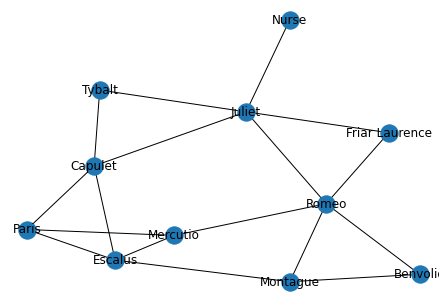

{'Benvolio': 0.2, 'Montague': 0.2, 'Paris': 0.25, 'Mercutio': 0.2, 'Escalus': 0.25}


['Paris', 'Escalus', 'Benvolio', 'Montague', 'Mercutio']

In [17]:
def create_romeojuliet_graph():
    rj = nx.Graph()
    rj.add_node("Tybalt")
    rj.add_node("Nurse")
    rj.add_node("Juliet")
    rj.add_node("Friar Laurence")
    rj.add_node("Capulet")
    rj.add_node("Benvolio")
    rj.add_node("Romeo")
    rj.add_node("Mercutio")
    rj.add_node("Montague")
    rj.add_node("Paris")
    rj.add_node("Escalus")

    rj.add_edge("Juliet", "Tybalt")
    rj.add_edge("Nurse", "Juliet")
    rj.add_edge("Juliet", "Capulet")
    rj.add_edge("Juliet", "Romeo")
    rj.add_edge("Juliet", "Friar Laurence")
    rj.add_edge("Tybalt", "Capulet")
    rj.add_edge("Romeo", "Benvolio")
    rj.add_edge("Romeo", "Friar Laurence")
    rj.add_edge("Romeo", "Mercutio")
    rj.add_edge("Romeo", "Montague")
    rj.add_edge("Benvolio", "Montague")
    rj.add_edge("Mercutio", "Escalus")
    rj.add_edge("Montague", "Escalus")
    rj.add_edge("Paris", "Mercutio")
    rj.add_edge("Escalus", "Paris")
    rj.add_edge("Capulet", "Paris")
    rj.add_edge("Capulet", "Escalus")

    return rj
rj = create_romeojuliet_graph()
nx.draw(rj,with_labels=True)
plt.show()
print(influence_map(rj, "Juliet"))
recommend_by_influence(rj, "Juliet")

This algorithm can also be easily understood by using a practice graph, this time we will use the friendship graph for some of the characters of "Romeo and Juliet"
Like the previous graph, an edge between person A and person B means that A considers B a friend, and also B considers A a friend


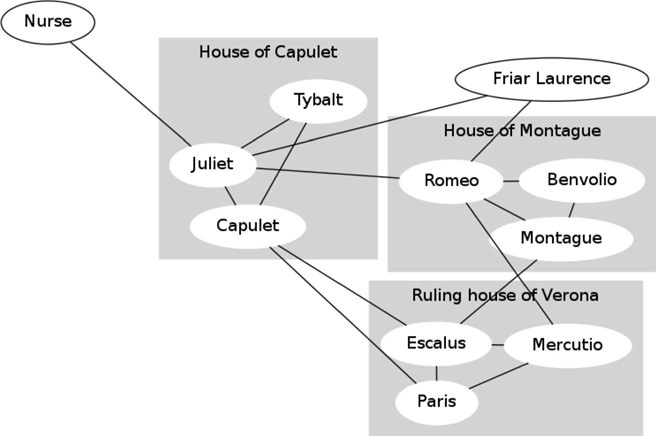

We have implemented two methods **influence_map(graph,user)** and **recommend_by_influence(graph, user)** , the first method returns a map of users who have atleast one friend in common with the input user and are not the friends of input user. The values are their scores calculated by the score formula explained above. The Second method calls the influence_graph method and then just sorts the keys of the map according to the descending order of their values.

# **Comparing both the algorithms**

Now as we have implemented both the algorithms it's time to start comparing them. We execute both the algorithms on the practice graph and find out the number of users for whom both the algorithms give same recommendations and the number of users for whom the recommendations are different.

We have implemented the **diff_algo(graph)** method to compare both the algorithms. It takes the graph as input and prints two separate list of users, one of which includes users having same recommendations and the other one has users with different recommendations

In [20]:
diff_algo(rj)

unchanged =  ['Romeo', 'Paris', 'Friar Laurence', 'Nurse']
changed =  ['Juliet', 'Benvolio', 'Montague', 'Mercutio', 'Capulet', 'Tybalt', 'Escalus']


# **Loading Facebook Data**

In this task we will create a graph of users using the facebook dataset and print the number of nodes and edges in the graph.

We use methods **create_facebook_graph** and **draw_facebook_graph** to create and draw the graph respectively. The Facebook file name is facebook_combined.txt. It contains two columns of user idl and user id2. Every row in the dataset implies that there is the friendship edge between the two user ids.

In [21]:
file_path = "/content/facebook_combined.txt"
fb_graph = create_facebook_graph(file_path)

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


# **Recommend by number of common friends on the Facebook data**

Here we will execute the recommend by number of common friends on Facebook data.

We have implemented the **top_10_common_fb()** method. It uses the recommend_by_**number_of_common_friends** method. We will find the top 1 0 friend recommendation using algorithm-1 of user id 1000,2000,3000  and 4000

In [23]:
top_10_common_fb(fb_graph)

rec for 1000 is ['1366', '1236', '1709', '1141', '1308', '1472', '1090', '1785', '1469', '1070']
rec for 3000 is ['3426', '2755', '2782', '2750', '2864', '2974', '2940', '3022', '2916', '2994']
rec for 2000 is ['2447', '1973', '1980', '2006', '1991', '2004', '2378', '2583', '2640', '1919']
rec for 4000 is ['4014', '3982', '3988', '3993', '4004', '4019', '3997', '4023', '3994', '4018']


# **Recommend by influence on the Facebook Data**

Here we will execute the recommend by influence algorithm on Facebook data.

We have implemented the **top_10_influence_fb()** method. It uses the **recommend_by_influence** method. We will find the top 10 friend recommendation of user id 1000,2000,3000 and 4000 using algorithm-2

In [24]:
top_10_influence_fb(fb_graph)

1000 ['1308', '1090', '1366', '1236', '1709', '1634', '1141', '1472', '1785', '1415']
3000 ['2782', '2994', '2755', '2773', '2974', '2864', '3426', '2750', '2920', '2940']
2000 ['1973', '2447', '1980', '2006', '1991', '2004', '2583', '2640', '2378', '1919']
4000 ['4014', '3982', '3988', '3993', '4004', '4019', '4023', '3997', '3985', '3983']


# **How good are the recommendations for the Romeo Juliet and Facebook Data**

Here we will check the accuracy of both the recommendation algorithms and find which one is better for our data by computing the average rank of both the algorithms on the Facebook and Romeo-Juliet graph.

We will test the two recommendation systems in the following way:

1)	Randomly choose a real friend connection; call the two friends Fl and F2.

2)	Remove their friendship from the graph.

3)	Compute friend recommendations for Fl and F2.

4)	Determine the rank of Fl in F2's list of recommended friends.

5)	Determine the rank of F2 in Fl 's list of recommended friends.

6)	If either of these does not exist (e.g., F1 is not recommended as one of F2s friends), discard the F1F2 pair from the experiment.

7)	Otherwise, average these two numbers.

8)	The "rank" is also known as the "index" or "position". It starts counting at 1, not 0.

9)	Put their friendship back in the graph.


We will repeat the above algorithm for 100 times on the Romeo-Juliet graph for both the recommendation system algorithms and compute the average rank. Based on the average rank we will decide which recommendation algorithm is better.

Similarly we will compute the average rank for both the algorithms on the Facebook data as well. The logic behind using 1 00 random friendship edges is to avoid the possibility of getting an incorrect result because it could be possible that for some edges algorithm 1 is better but overall it is worse than algorithm 2 or vice versa. It is very unlikely that even after randomly choosing the friendship edges we would still suffer from the above error.

We have used the following methods to compute the rank:

1)	get_friend_rank : This method calculates the rank of Fl in F2's list and vice versa

2)	average_rank_calc : This method is used to calculate the average rank for a pair of friends

3)	common_rank_calc : This method calls average_rank_calc method to calculate rank for common friends algorithm 

4) influence_rank_calc : This method calls average_rank_calc method to calculate rank for influence friends algorithm

5)  evaluate_recommender : This method computes the rank for 100 pairs of friendship for both the algorithms using the above methods and then decides which algorithm out of common friends and influence is better.


In [36]:
import random
import sys
evaluate_recommender(rj)
evaluate_recommender(fb_graph)

Average rank of influence method: 2.45625 
Average rank of number of friends in common method: 3.0
Influence method is better
Average rank of influence method: 51.422680412371136 
Average rank of number of friends in common method: 60.52061855670103
Influence method is better


We can see that influence recommendation is working more accurate for both Romeo Juliet Graph as well as Facebook Dataset Graph in which influence recommendation scored 2.45 whereas number of common friends recommendation scored 3.0 which says that Influence method is working more better than Friends of Friends algorithm which was proposed by Facebook.

In Case of Huge Facebook Dataset Influence recommendation scored 51 whereas Number of Common Friends algorithm scored 60 making worst indexing but Influence Recommendation Algorithm is working more accurate and faster and it is scoring least ranking and making the recommedations accurate.

# **Conclusion:**

After testing our recommendation algorithms on both the dataset we can see that Influence method is better for both the Romeo-Juliet graph and Facebook graph than the common friends algorithm since the average computed rank is less for the influence method than the number of common friends algorithm.